In [1]:
from __future__ import print_function
from __future__ import division
import numpy as np
import xarray as xr
import os
import sys
sys.path.append('./scripts/')
import proplot as plot
from analysis_functions import (get_ds_arr_from_exps, sigma_to_pressure_level, 
                                get_global_mean, get_unique_line_labels)
import warnings
warnings.simplefilter(action='ignore')

In [2]:
P = os.path.join
fig_dir = 'figs'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

# Read dataset array
print('Read dataset...')

start_file = 121 
end_file = 240
exp_folder_name = 'soc_realistic_continents_fixed_sst_with_sundqvist_cld_scheme_new_qcl_0.18'
base_dir = '/scratch/ql260/mount_gv_data/gv2_data_isca/'
file_name='atmos_monthly_plev.nc'

try:
    ds_arr = get_ds_arr_from_exps([exp_folder_name], start_file, end_file, base_dir=base_dir, file_name=file_name)
except:
    print('Interp first...')
    # interp data first
    plevs = [100000, 95000, 90000, 85000, 80000, 75000, 70000, 65000, 60000, 55000,
            50000, 45000, 40000, 35000, 30000, 25000, 20000, 15000, 10000, 5000, 0]
    sigma_to_pressure_level(exp_folder_name, start_file, end_file, p_levs=plevs, base_dir=base_dir)
    ds_arr = get_ds_arr_from_exps([exp_folder_name], start_file, end_file, base_dir=b_dir, file_name=file_name)


Read dataset...


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


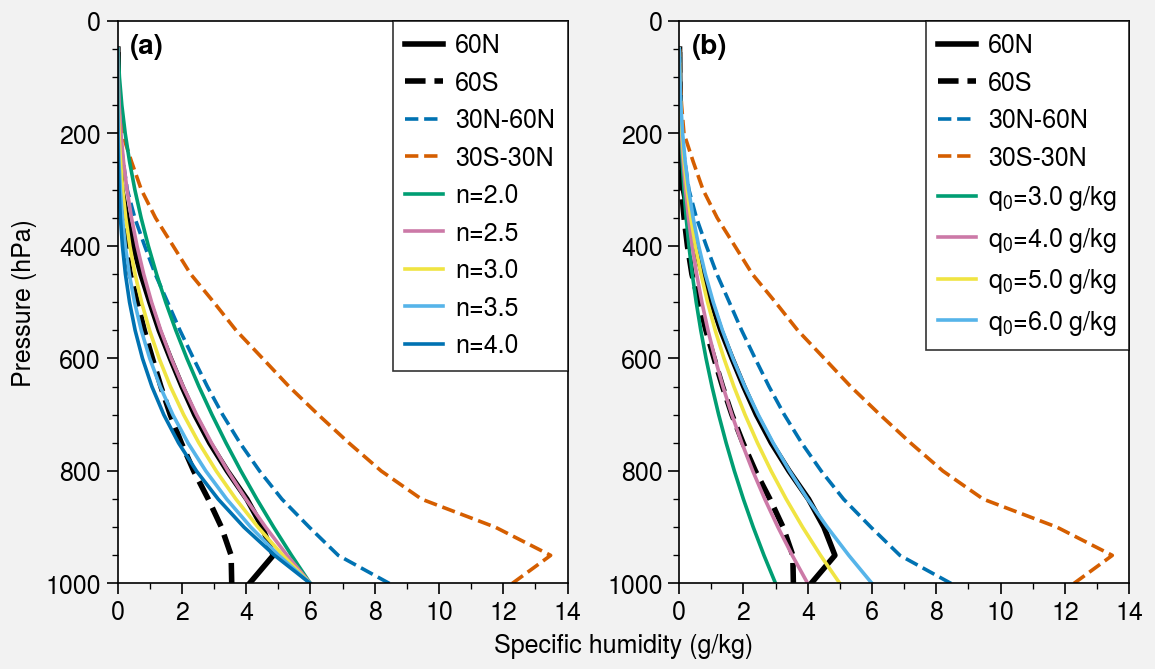

In [3]:
# ==================================================== #
# plot begin
# ==================================================== #

plot.rc.margin = 0.05
plot.close('all')

fig, axes = plot.subplots(nrows=1, ncols=2, aspect=(0.8, 1), share=1)

ds = ds_arr[0]
sphum = ds.sphum

ax = axes[0]
lines = []
l_lat = np.logical_and(ds.lat>59, ds.lat<=60)
q = sphum.where(l_lat, drop=True)
q_gm = get_global_mean(q)
l = ax.plot(q_gm.mean('time')*1e3, ds.pfull, 'k-', linewidth=2, label='60N')
lines.extend(l)

l_lat = np.logical_and(ds.lat>=-60, ds.lat<-59)
q = sphum.where(l_lat, drop=True)
q_gm = get_global_mean(q)
q_gm = get_global_mean(q)
l = ax.plot(q_gm.mean('time')*1e3, ds.pfull, 'k--', linewidth=2, label='60S')
lines.extend(l)

l_lat = np.logical_and(ds.lat>30, ds.lat<=60)
q = sphum.where(l_lat, drop=True)
q_gm = get_global_mean(q)
l = ax.plot(q_gm.mean('time')*1e3, ds.pfull, '--', label='30N-60N')
lines.extend(l)

l_lat = np.logical_and(ds.lat>-30, ds.lat<=30)
q = sphum.where(l_lat, drop=True)
q_gm = get_global_mean(q)
l = ax.plot(q_gm.mean('time')*1e3, ds.pfull, '--', label='30S-30N')
lines.extend(l)

## plot fit line
qv = 6 # g/kg
fl = 1  # useless here, because it can be combined with qv

for nn in np.arange(2, 4.5, 0.5):
    q_fit_polar = fl * (ds.pfull/1e3)**nn * qv
    l = ax.plot(q_fit_polar, ds.pfull, '-', label='n={:2.1f}'.format(nn))
    lines.extend(l)

new_lines, new_labels = get_unique_line_labels(lines)
ax.legend(new_lines, new_labels, ncol=1)
ax.set_ylim([0, 1000])
ax.invert_yaxis()

# ============================================================= #
# plot the q profile with varied q threshold values at bottom
# ============================================================= #
ax = axes[1]
lines = []
l_lat = np.logical_and(ds.lat>59, ds.lat<=60)
q = sphum.where(l_lat, drop=True)
q_gm = get_global_mean(q)
l = ax.plot(q_gm.mean('time')*1e3, ds.pfull, 'k-', linewidth=2, label='60N')
lines.extend(l)

l_lat = np.logical_and(ds.lat>=-60, ds.lat<-59)
q = sphum.where(l_lat, drop=True)
q_gm = get_global_mean(q)
q_gm = get_global_mean(q)
l = ax.plot(q_gm.mean('time')*1e3, ds.pfull, 'k--', linewidth=2, label='60S')
lines.extend(l)

l_lat = np.logical_and(ds.lat>30, ds.lat<=60)
q = sphum.where(l_lat, drop=True)
q_gm = get_global_mean(q)
l = ax.plot(q_gm.mean('time')*1e3, ds.pfull, '--', label='30N-60N')
lines.extend(l)

l_lat = np.logical_and(ds.lat>-30, ds.lat<=30)
q = sphum.where(l_lat, drop=True)
q_gm = get_global_mean(q)
l = ax.plot(q_gm.mean('time')*1e3, ds.pfull, '--', label='30S-30N')
lines.extend(l)

## plot fit line
# qv = 6 # g/kg
fl = 1  # useless here, because it can be combined with qv
nn = 2.5
for qv in np.arange(3,7,1):
    q_fit_polar = fl * (ds.pfull/1e3)**nn * qv
    l = ax.plot(q_fit_polar, ds.pfull, '-', label='$q_0$={:2.1f} g/kg'.format(qv))
    lines.extend(l)

new_lines, new_labels = get_unique_line_labels(lines)
ax.legend(new_lines, new_labels, ncol=1)
ax.set_ylim([0, 1000])
ax.invert_yaxis()

axes.format(xlabel='Specific humidity (g/kg)', ylabel='Pressure (hPa)', 
    xlim=[0, 14], xlocator=np.arange(0, 15, 2), 
    xminorlocator=1, xtickminor=True, grid=False, abc=True, abcloc='ul', abcstyle='(a)')

fig.tight_layout()
figname = P(fig_dir, 'areas_affected_with_various_qv_thresholds.pdf')
fig.savefig(figname, bbox_inches='tight', pad_inches=0.1, transparent=False)
fig.savefig(figname.replace('.pdf', '.eps'), bbox_inches='tight', pad_inches=0.1, transparent=False)